In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import platform
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [126]:
#Reading the pre_processed data
os_type = platform.system()
if os_type.startswith("Darwin"):
    data = pd.read_excel(r"C:\Users\abdul\Desktop\Untitled Folder\Bitcoin BEP2.xlsx")
else: 
    data = pd.read_excel(r"C:\Users\abdul\Desktop\Untitled Folder\Bitcoin BEP2.xlsx")
#Droping the target col
feature_value_temp = data.drop("High", axis=1)
#Droping the Distric col as it is string and will be assigned value by clustering
features = feature_value_temp.drop("Currency",axis=1)
features = features.drop("Low",axis=1)
features = features.drop("Date",axis=1)
features = features.drop("Close",axis=1)
target_col = data["High"]

In [127]:
features.head()

,Open,Volume
0,9128.269531,952850
1,9068.174805,131077
2,9271.567383,83052
3,9526.833984,76227
4,10151.890625,84485


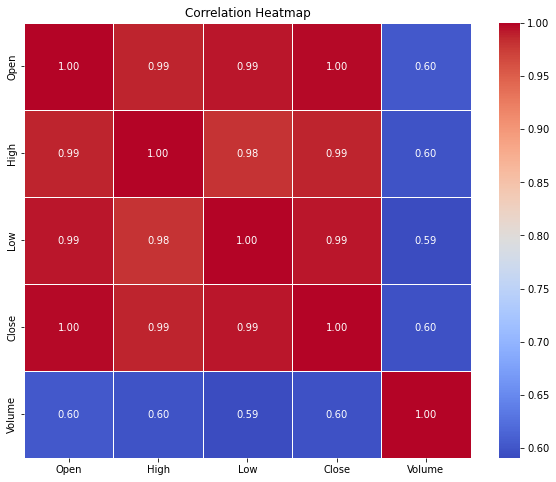

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(features, target_col, test_size=0.3, random_state=29)

In [130]:
mse_value = []
estimators_ = []
for estimator in range(50,70):
    RF_model = RandomForestRegressor(n_estimators = estimator ,random_state= 22)
    RF_model.fit(X_train,y_train)
    y_pred = RF_model.predict(X_test)
    estimators_.append(estimator)
    mse_value.append(mean_squared_error(y_test, y_pred))

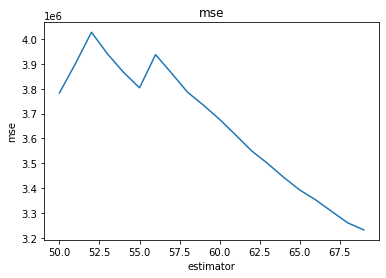

In [131]:
import matplotlib.pyplot as plt
plt.plot(estimators_, mse_value)
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

In [133]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
import numpy as np
model = RandomForestRegressor(n_estimators=65, random_state= 22)
model.fit(X_train,y_train)
# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
print("R2 Score:", r2_score(y_test, y_pred))
# data= np.array([39723.42,19579868])
# reshaped_data = data.reshape(1, -1)
# result= model.predict(reshaped_data)
print(y_pred)
print(y_test)

Root Mean Squared Error: 1841.9879998478268
Mean Squared Error: 3392919.7915833974
R2 Score: 0.9903646353545472
[40242.45955529]
636     60821.179688
1141    24804.259766
804     49036.531250
1053    30667.035156
278      6344.295410
            ...     
885     58379.640625
1119    23610.177734
393      9496.207031
175      7621.754883
799     49087.917969
Name: High, Length: 346, dtype: float64


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Load the CSV file into a DataFrame
# Replace 'your_file.csv' with the actual file path
file_path = "C:\\Users\\abdul\\Desktop\\Untitled Folder\\BTC_1Y_graph_coinmarketcap.csv"
df = pd.read_csv(file_path, delimiter=';')

# Specify the columns you want to use for training
# Replace 'feature1' and 'feature2' with the actual column names


# Specify the target column
# Replace 'target' with the actual column name
y = df['high']
for i in range(len(df['open'])):
    df["yesno"] = "yes" if (df['open'][i]-df['high'][i] <= 0) else "no"
X = df[['open', 'volume','marketCap',"close"]]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df)
# Create a Random Forest model
# You can adjust the parameters based on your requirements
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Model Accuracy: {accuracy:.2f}')
mse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {mse}")
print(y_pred)
print(y_test)
print("R2 Score:", r2_score(y_test, y_pred))

data= np.array([39033,19579962,764332223691,39006])
reshaped_data = data.reshape(1, -1)
result= model.predict(reshaped_data)
print(f"Result: {result}")

    name          open          high           low         close  \
0   2790  15858.173526  15945.104942  15347.322679  15400.726494   
1   2790  15399.694887  16040.637258  15399.694887  16040.637258   
2   2790  16037.788890  19435.727622  16037.788890  19292.563853   
3   2790  19292.648113  21404.370272  18992.671007  20912.802082   
4   2790  20913.421578  22010.077923  20573.236120  21868.915592   
5   2790  21867.232655  21921.278884  20881.930111  21283.345747   
6   2790  21276.771579  21776.461052  20172.696816  20404.347998   
7   2790  20402.762265  23547.526192  20019.258162  22763.714900   
8   2790  22773.603706  23523.306265  21623.605263  22324.956069   
9   2790  22324.851504  22433.513897  20860.759837  21112.963071   
10  2790  21110.778468  21149.107106  18532.860321  20735.882329   
11  2790  20729.201739  26611.178998  20527.292881  26252.583314   
12  2790  26263.652190  26681.711000  24632.041333  25981.089313   
13  2790  25987.845051  26916.164751  24685.7392